## EDA Analysis

**User story addressed**: How big a chosen park is compared to others.

In [11]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read in dataset
data = pd.read_csv("../data/raw/parks.csv", sep=';')
data.head()

,ParkID,Name,Official,Advisories,SpecialFeatures,Facilities,Washrooms,StreetNumber,StreetName,EWStreet,NSStreet,NeighbourhoodName,NeighbourhoodURL,Hectare,GoogleMapDest
0,1,Arbutus Village Park,1,N,N,Y,N,4202,Valley Drive,King Edward Avenue,Valley Drive,Arbutus-Ridge,https://vancouver.ca/news-calendar/arbutus-rid...,1.41,"49.249783, -123.15525"
1,8,Trafalgar Park,1,N,N,Y,Y,2610,W 23rd Avenue,W 23rd Avenue,Valley Drive,Arbutus-Ridge,https://vancouver.ca/news-calendar/arbutus-rid...,4.85,"49.25046, -123.161879"
2,14,Coopers' Park,1,N,Y,Y,N,1020,Marinaside Crescent,Nelson Street,Marinaside Crescent,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,1.71,"49.273253, -123.1139"
3,18,Devonian Harbour Park,1,N,Y,Y,N,1929,W Georgia Street,W Georgia Street,Denman Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,4.42,"49.294353, -123.134654"
4,20,Emery Barnes Park,1,N,N,Y,N,1170,Richards Street,Davie Street,Richards Street,Downtown,https://vancouver.ca/news-calendar/downtown.aspx,0.85,"49.276458, -123.123995"


In [10]:
# randomly sample a park
sampled_id = data['ParkID'].sample(n=1, random_state=532).iloc[0]
sampled_size = data[data['ParkID'] == sampled_id]['Hectare'].iloc[0]
print("The ID of the selected park is: ", sampled_id)
print("The size of the selected park is: ", sampled_size)

The ID of the selected park is:  245
The size of the selected park is:  3.05


### 1. Visualization: Histogram with a vertical line

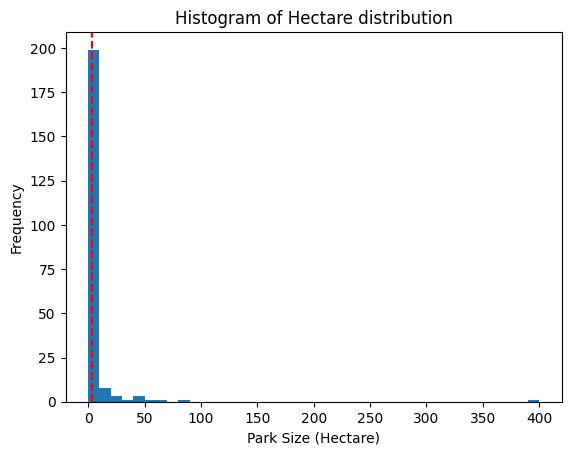

In [16]:
plt.figure()
plt.hist(data['Hectare'], bins=40)
plt.axvline(sampled_size, linestyle='--', color='red')
plt.xlabel('Park Size (Hectare)')
plt.ylabel('Frequency')
plt.title('Histogram of Hectare distribution')
plt.show();

### 2. Summary table: compare with mean/median/min/max and return percentile

In [20]:
percentile = str(round((data['Hectare'] < sampled_size).mean() * 100, 2)) + '%'

summary = {
    'Sampled Park Size': sampled_size,
    'Mean Hectare': round(data['Hectare'].mean(), 2),
    'Median Hectare': round(data['Hectare'].median(), 2),
    'Min Hectare': round(data['Hectare'].min(), 2),
    'Max Hectare': round(data['Hectare'].max(), 2),
    'Percentile of Sampled Size': percentile
}

summary_df = pd.DataFrame([summary])
summary_df

,Sampled Park Size,Mean Hectare,Median Hectare,Min Hectare,Max Hectare,Percentile of Sampled Size
0,3.05,6.2,1.4,0.0,400.0,69.27%
